In [1]:
import numpy as np 
import pandas as pd 
!pip install category_encoders

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-shop-data-set/Customer-Churn-Prediction.csv


In [2]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [3]:
path = '/kaggle/input/customer-shop-data-set/Customer-Churn-Prediction.csv'
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
column = df.columns
y = df['Churn']

**Check Single column and there relation**

In [5]:
x = df['gender']
encoder = ce.BinaryEncoder(cols=['gender'])
x = encoder.fit_transform(x)
x.head()
x.count()

gender_0    7043
gender_1    7043
dtype: int64

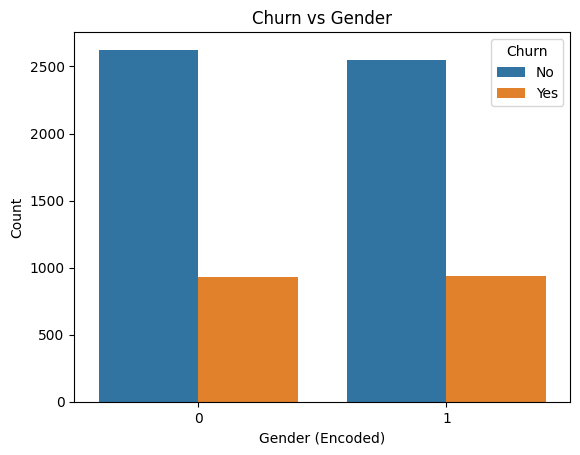

In [6]:
# plt.scatter(x['gender_0'], y)
sns.countplot(x='gender_1', hue='Churn', data=pd.concat([x, y], axis=1)) 
plt.title('Churn vs Gender')
plt.xlabel('Gender (Encoded)')
plt.ylabel('Count')
plt.show()

In [7]:
model = LogisticRegression()
model.fit(x,y)
model.score(x,y)

0.7346301292063041